# Introduction

Tugas ini dibuat dan disajikan untuk memenuhi Assignment 2

# Project Overview

Dataset NYC Property Sales From Kaggle. This dataset is a record of <b>every building</b> or building unit (apartment, etc) sold in New York City property market over a 12-month period from September 2016 to September 2017.
Dataset Descriptions

<b>Dataset Descriptions</b>

<ol>
<li>BOROUGH : kode digit yang menyatakan wilayah dari lokasi properti</li>
    <li>BLOCK and LOT: A Tax Block is a sub-division of the borough on which real properties are located. The Department of Finance uses a Borough-Block-Lot classification to label all real property in the City. “Whereas” addresses describe the street location of a property, the block and lot distinguishes one unit of real property from another, such as the different condominiums in a single building. Also, block and lots are not subject to name changes based on which side of the parcel the building puts its entrance on. A Tax Lot is a subdivision of a Tax Block and represents the property unique location. Because there are more than 11k unique blocks in the dataset, it doesn't make sense to define it as a categorical variable! Will leave it as numerical. The same story for LOT</li>
    <li>NEIGHBORHOOD: Department of Finance assessors determine the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines and some sub-neighborhoods may not be included. This variable should be categorical.</li>
    <li>BUILDING CLASS CATEGORY: This is a field that we are including so that users of the Rolling Sales Files can easily identify similar properties by broad usage (e.g. One Family Homes) without looking up individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class Category, Block and Lot. This variable should be categorical.</li>
    <li>TAX CLASS AT PRESENT Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property. This variable should be categorical.</li>
    <li>BUILDING CLASS AT PRESENT: The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class used by the Department of Finance is interchangeable with the term Building Code used by the Department of Buildings. This variable should be categorical.</li>
    <li>ADDRESS: The street address of the property as listed on the Sales File. Coop sales include the apartment number in the address field. We are not going to extract any information from the address in this course!</li>
    <li>ZIP CODE: The property’s postal code. This variable should be categorical.</li>
    <li>RESIDENTIAL UNITS : The number of residential units at the listed property. This variable should be numeric</li>
    <li>COMMERCIAL UNITS :The number of commercial units at the listed property. This variable should be numeric</li>
    <li>TOTAL UNITS :The total number of units at the listed property. This variable should be numeric</li>
    <li>LAND SQUARE FEET : The land area of the property listed in square feet. This variable should be numeric</li>
    <li>GROSS SQUARE FEET : The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property. This variable should be numeric</li>
    <li>YEAR BUILT : Year the structure on the property was built. This variable should be categorical</li>
        <li>TAX CLASS AT TIME OF SALE and BUILDING CLASS AT TIME OF SALE. Both of these variables should be categorical.</li>
    <li>SALE PRICE : This variable should be numeric.</li>
    <li>SALE DATE : This variable should be data time. However, we can save the "year" or "month" part as a new categorical variable.</li>
    <li>EASEMENT: An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property.</li>
</ol>

# Import and Install Required Libraries

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
import statsmodels.api as sm
%matplotlib inline

In [3]:
# mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN']
df_nyc_sales = pd.read_csv('./dataset/Assignment_2/nyc-rolling-sales.csv', na_values=missing_values)

# Membaca dataset

In [4]:
df_nyc_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Preprocessing

## Pengecekkan dimensi dari dataset

In [6]:
df_nyc_sales.shape

(84548, 22)

## Pengecekkan nama kolom dataset

In [7]:
df_nyc_sales.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [8]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

<b>ANALISIS</b>
Pada beberapa kolom masih terdapat unstandard missing values yang tidak berhasil diidentifikasi oleh Pandas sebagai missing values. Berikut ini adalah rangkumannya:
</br>
<ol>
    <li>Kolom "Unnamed: 0" sebagai iterator dan tidak diperlukan untuk analisis berikutnya, sehingga akan didrop</li>
    <li>Kolom 'TAX CLASS AT PRESENT' mengandung nilai (' ') yang diidentifikasi sebagai missing values</li>
    <li>Kolom 'EASE-MENT' tidak mengandung informasi dan hanya memuat satu nilai (' ') yang diidentifikasi sebagai missing values, sehingga untuk selanjutnya akan dibuang</li>
    <li>Kolom 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER' mengandung nilai (' ') yang diidentifikasi sebagai missing values.</li>
    <li>Kolom 'ZIP CODE', 'YEAR BUILT', 'TOTAL UNITS' mengandung nilai (0) yang diidentifikasi sebagai missing values</li>
    <li>Kolom 'SALE PRICE' mengandung nilai (' - ') yang diidentifikasi sebagai missing values, selanjutnya nilai ini akan diganti dengan 0 dan dianggap tidak ada transaksi</li>
</ol>

# Data Cleaning

## Menambahkan unstandard missing values

In [15]:
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df_nyc_sales = pd.read_csv('/Users/Bintang/nyc-rolling-sales.csv', na_values=missing_values)

In [16]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [17]:
df_nyc_sales['YEAR BUILT']=df_nyc_sales['YEAR BUILT'].replace({0:np.nan})
df_nyc_sales['ZIP CODE']=df_nyc_sales['ZIP CODE'].replace({0:np.nan})
df_nyc_sales['TOTAL UNITS']=df_nyc_sales['TOTAL UNITS'].replace({0:np.nan})

In [18]:
unnecessary_columns = ['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER']
df_nyc_sales.drop(unnecessary_columns,inplace=True, axis=1)

In [19]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            83810 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   BUILDING CLASS AT PRESENT       83810 non-null  object 
 7   ZIP CODE                        83566 non-null  float64
 8   RESIDENTIAL UNITS               84548 non-null  int64  
 9   COMMERCIAL UNITS                84548 non-null  int64  
 10  TOTAL UNITS                     64786 non-null  float64
 11  LAND SQUARE FEET                58296 non-null  float64
 12  GROSS SQUARE FEET               

In [20]:
df_nyc_sales['SALE PRICE']= pd.to_numeric(df_nyc_sales['SALE PRICE'], errors='coerce')
df_nyc_sales['LAND SQUARE FEET'] = pd.to_numeric(df_nyc_sales['LAND SQUARE FEET'], errors='coerce')
df_nyc_sales['GROSS SQUARE FEET'] = pd.to_numeric(df_nyc_sales['GROSS SQUARE FEET'], errors='coerce')
df_nyc_sales['SALE DATE']=pd.to_datetime(df_nyc_sales['SALE DATE'], errors='coerce')
categorical = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
         'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df_nyc_sales[col] = df_nyc_sales[col].astype('category')

In [37]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   RESIDENTIAL UNITS               84548 non-null  int64         
 8   COMMERCIAL UNITS                84548 non-null  int64         
 9   TOTAL UNITS                     84548 non-null  int64         
 10  LAND SQUARE FEET                58296 non-null  float64       
 11  GR

Mengecek dan menghapus baris duplikat

In [15]:
sum(df_nyc_sales.duplicated())

959

In [16]:
df_nyc_sales=df_nyc_sales.drop_duplicates(df_nyc_sales.columns, keep='last')

In [17]:
sum(df_nyc_sales.duplicated())

0

### Handling Missing Values

Mengecek jumlah missing values pada setiap kolom

In [18]:
df_nyc_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  25954
GROSS SQUARE FEET                 27282
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14074
SALE DATE                             0
dtype: int64

In [21]:
categoricals_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in categoricals_columns:
    df_nyc_sales[cat_col].fillna(df_nyc_sales[cat_col].mode()[0],inplace=True)

In [22]:
float_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_columns:
    df_nyc_sales[float_col].fillna(df_nyc_sales[float_col].median(),inplace=True)

In [23]:
df_nyc_sales.dropna(inplace=True)

In [25]:
df_nyc_sales[
    df_nyc_sales.duplicated()
]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,10001.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1500000.0,2016-10-05
2296,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,24,1123,R4,10004.0,1,0,1.0,2325.0,1680.0,1982.0,2,R4,1200000.0,2017-04-28
3427,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,879,1207,R4,10010.0,1,0,1.0,2325.0,1680.0,2009.0,2,R4,716000.0,2017-04-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,10304.0,1,0,1.0,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,10301.0,2,0,2.0,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,10301.0,1,0,1.0,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,10310.0,1,0,1.0,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30


In [26]:
rows_duplicated = df_nyc_sales.duplicated()
print(rows_duplicated.sum())

367


Ada sejumlah 367 data duplikat, data duplikat ini akan dihapus

In [27]:
df_nyc_sales.drop_duplicates(subset=df_nyc_sales.columns,keep='first', inplace=True)
df_nyc_sales.shape

(51996, 18)

## Ubah tipe data setiap kolom sesuai dengan tipe

In [28]:
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# ubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoricals_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('str')

# ubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('float64')

# ubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('int64')

In [30]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51996 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         51996 non-null  object        
 1   NEIGHBORHOOD                    51996 non-null  object        
 2   BUILDING CLASS CATEGORY         51996 non-null  object        
 3   TAX CLASS AT PRESENT            51996 non-null  object        
 4   BLOCK                           51996 non-null  int64         
 5   LOT                             51996 non-null  int64         
 6   BUILDING CLASS AT PRESENT       51996 non-null  object        
 7   ZIP CODE                        51996 non-null  object        
 8   RESIDENTIAL UNITS               51996 non-null  int64         
 9   COMMERCIAL UNITS                51996 non-null  int64         
 10  TOTAL UNITS                     51996 non-null  float64       
 11  LA

In [29]:
df_nyc_sales['SALE PRICE'].describe()

count    5.199600e+04
mean     1.414616e+06
std      1.297811e+07
min      0.000000e+00
25%      2.500000e+05
50%      5.722560e+05
75%      9.900000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [31]:
df_nyc_sales['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

## Remove Outliers

In [33]:
df_nyc_sales= df_nyc_sales[(df_nyc_sales['SALE PRICE']>100000) & (df_nyc_sales['SALE PRICE']<5000000)]

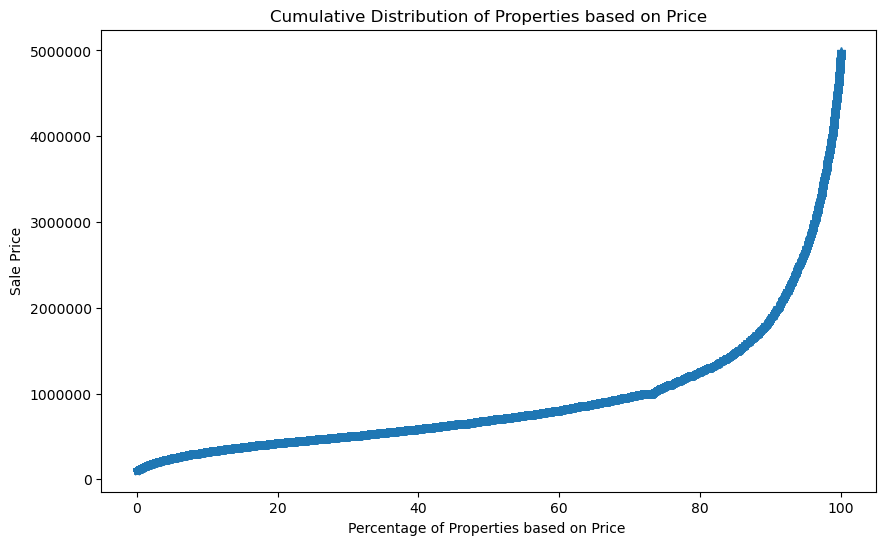

In [34]:
# do the same as above to get data property proportion and plot the data, then see the result
x = df_nyc_sales[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION']= 1
x['PROPERTY PROPORTION']= x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

plt.figure(figsize=(10,6))
plt.plot(x['PROPERTY PROPORTION'], x['SALE PRICE'], linestyle=None, marker='*')
plt.title("Cumulative Distribution of Properties based on Price")
plt.xlabel("Percentage of Properties based on Price ")
plt.ylabel("Sale Price")
plt.ticklabel_format(style='plain',axis='y')
plt.show()

Data distribusi sudah tidak ada outliers

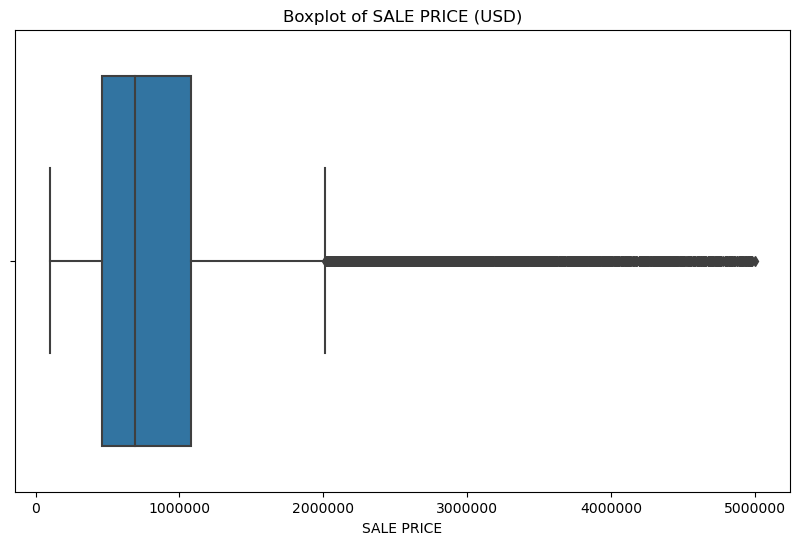

In [35]:
# plot curve using boxplot to see another view of the data
plt.figure(figsize=(10,6))
sns.boxplot(x='SALE PRICE', data=df_nyc_sales)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot of SALE PRICE (USD)")
plt.show()

ploting menggunakan kurva boxplot dapat kita lihat sudah tidak ada outliers, data sudah lebih baik

In [36]:
mean = df_nyc_sales['SALE PRICE'].mean()
median= df_nyc_sales['SALE PRICE'].median()
print(mean)
print(median)

934758.9835989955
688000.0


C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


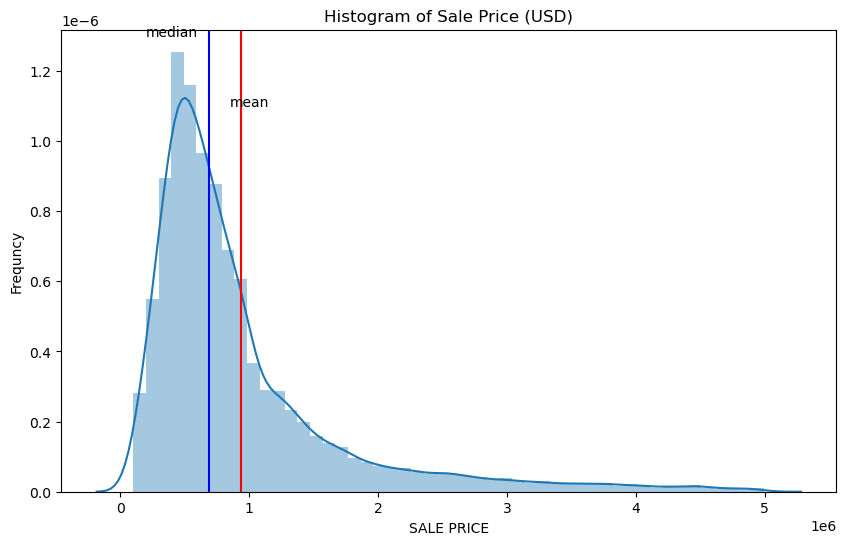

In [37]:
#let's take a look distribution of the data, the data is skewness or normal distribution
plt.figure(figsize=(10,6))
sns.distplot(df_nyc_sales['SALE PRICE'])
plt.title('Histogram of Sale Price (USD)')
plt.ylabel("Frequncy")
plt.axvline(df_nyc_sales[(df_nyc_sales['SALE PRICE']>100000) & (df_nyc_sales['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(df_nyc_sales[(df_nyc_sales['SALE PRICE']>100000) & (df_nyc_sales['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(200000,0.0000013, "median")
plt.text(850000,0.0000011, "mean")
plt.show()

Sebaran data diatas menunjukkan adanya positive skewness karena nilai Mean lebih besar daripada Median

C:\Users\Bintang\AppData\Local\Temp\ipykernel_6296\3990714848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyc_sales['SALE PRICE']=np.log(df_nyc_sales['SALE PRICE'])
C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.27222411776730127


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

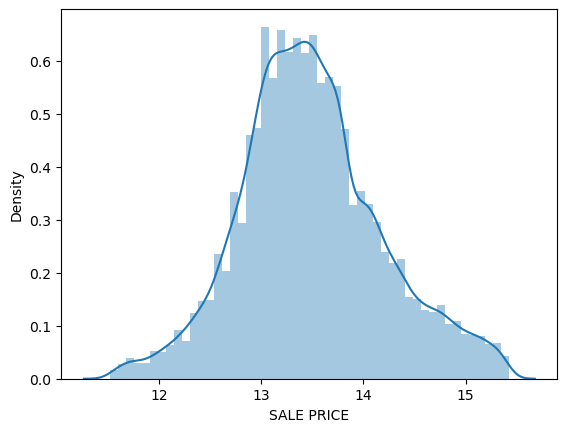

In [38]:
# let's normalize the data
df_nyc_sales['SALE PRICE']=np.log(df_nyc_sales['SALE PRICE'])
print(df_nyc_sales['SALE PRICE'].skew())
sns.distplot(df_nyc_sales['SALE PRICE'])

Data distribusi sudah tidak terdapat skewness yang berarti sebaran data sudah normal

In [39]:
missing_value = df_nyc_sales.isnull().sum()/len(df_nyc_sales)*100
print(pd.DataFrame([missing_value[missing_value>0], pd.Series(df_nyc_sales.isnull().sum()[df_nyc_sales.isnull().sum()>1000])],
                  index=['percent missing', 'num of missing']))

Empty DataFrame
Columns: []
Index: [percent missing, num of missing]


In [40]:
df_nyc_sales.agg(['skew','kurtosis']).transpose()

C:\Users\Bintang\AppData\Local\Temp\ipykernel_6296\1687702707.py:1: FutureWarning: ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_nyc_sales.agg(['skew','kurtosis']).transpose()


,skew,kurtosis
BLOCK,0.921043,0.258215
LOT,2.851858,16.271653
ZIP CODE,-0.558922,-1.379638
RESIDENTIAL UNITS,136.971711,22688.983139
COMMERCIAL UNITS,195.180187,38384.102443
TOTAL UNITS,119.707179,15842.138846
LAND SQUARE FEET,123.341328,17698.545768
GROSS SQUARE FEET,152.700548,26866.631535
YEAR BUILT,0.429661,-1.017463
TAX CLASS AT TIME OF SALE,2.019382,4.896097


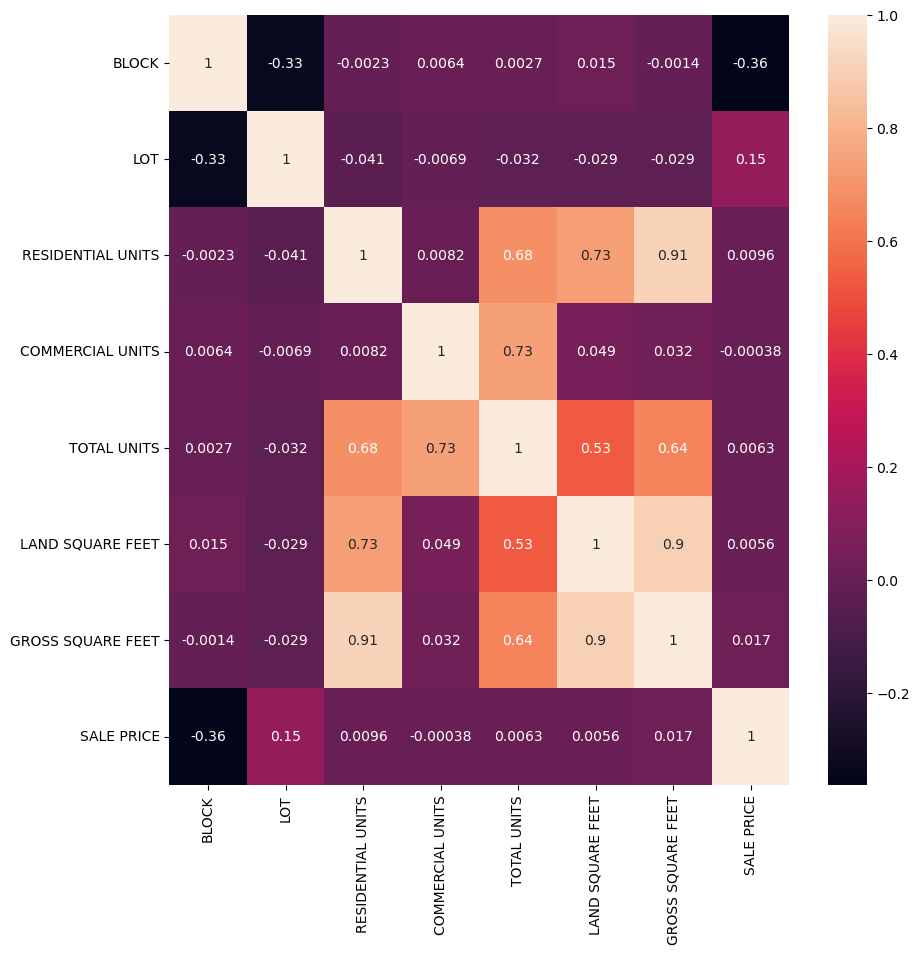

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df_nyc_sales.corr(), annot=True)
plt.show()

In [42]:
df_nyc_sales.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,39022.000000,39022.000000,39022.000000,39022.000000,39022.000000,3.902200e+04,3.902200e+04,39022.000000
mean,4687.325073,463.691046,1.732946,0.139716,1.881657,2.956819e+03,2.187916e+03,13.490395
std,3731.651471,714.394812,10.706426,11.492687,15.770253,2.657461e+04,2.085157e+04,0.696829
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,11.519901
25%,1532.000000,28.000000,1.000000,0.000000,1.000000,1.958000e+03,1.280000e+03,13.038982
50%,4010.000000,62.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,13.441544
75%,6799.000000,1027.000000,2.000000,0.000000,2.000000,3.000000e+03,2.144000e+03,13.893430
max,16319.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,15.424316


Dari deskripsi statistik data diatas, dataset terlihat banyak memiliki outliers terutama data yang berhubungan dengan properti unit

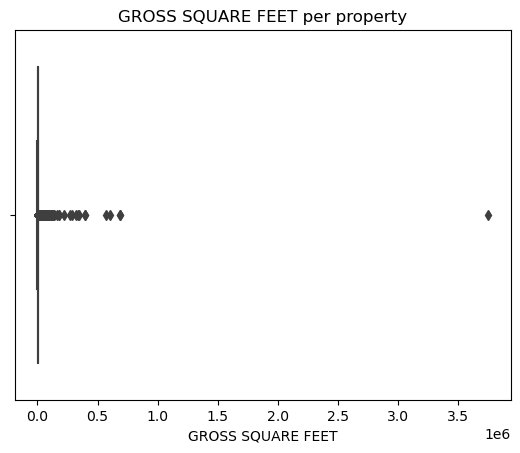

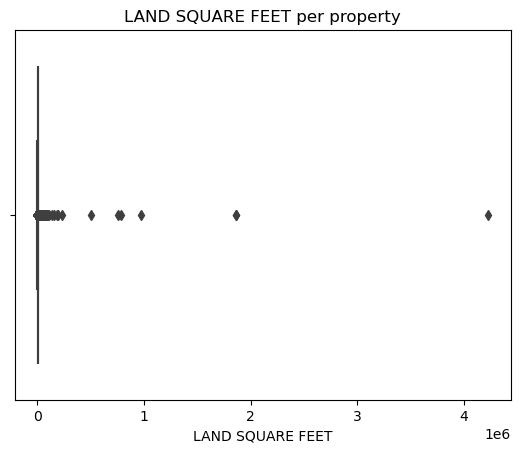

In [43]:
sns.boxplot(x='GROSS SQUARE FEET',data=df_nyc_sales)
plt.title('GROSS SQUARE FEET per property')
plt.show()

sns.boxplot(x='LAND SQUARE FEET',data=df_nyc_sales)
plt.title('LAND SQUARE FEET per property')
plt.show()

In [44]:
# untuk menghilangkan outliers, ambil data kurang dari 20000
df_nyc_sales = df_nyc_sales[df_nyc_sales['GROSS SQUARE FEET'] < 20000]
df_nyc_sales = df_nyc_sales[df_nyc_sales['LAND SQUARE FEET'] < 20000]

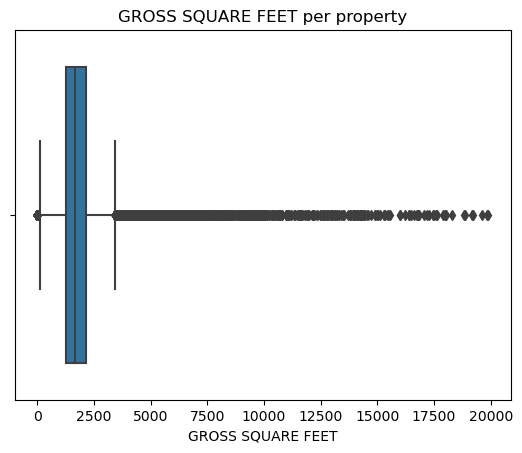

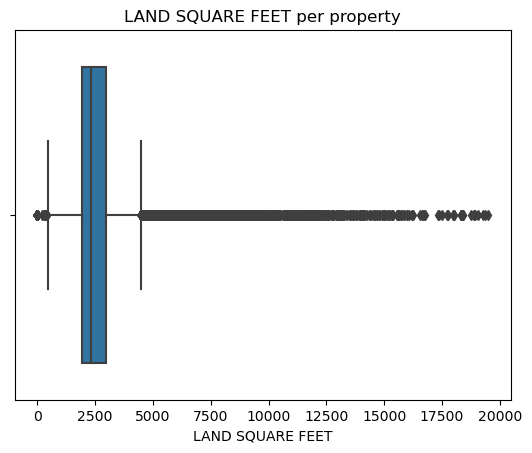

In [45]:
sns.boxplot(x='GROSS SQUARE FEET',data=df_nyc_sales)
plt.title('GROSS SQUARE FEET per property')
plt.show()

sns.boxplot(x='LAND SQUARE FEET',data=df_nyc_sales)
plt.title('LAND SQUARE FEET per property')
plt.show()

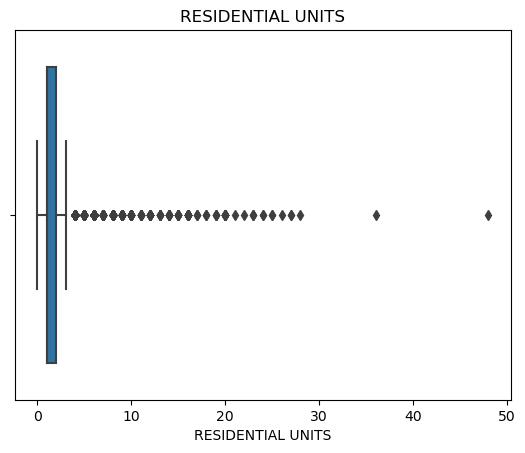

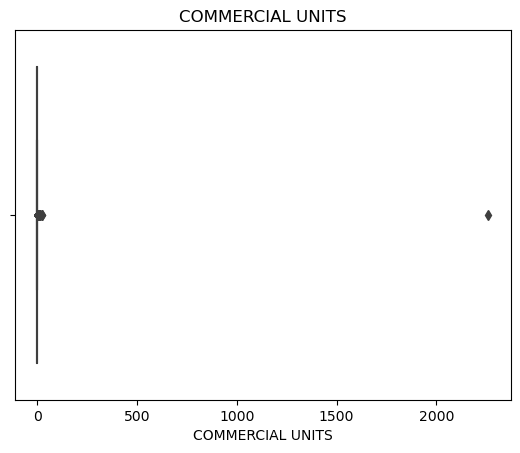

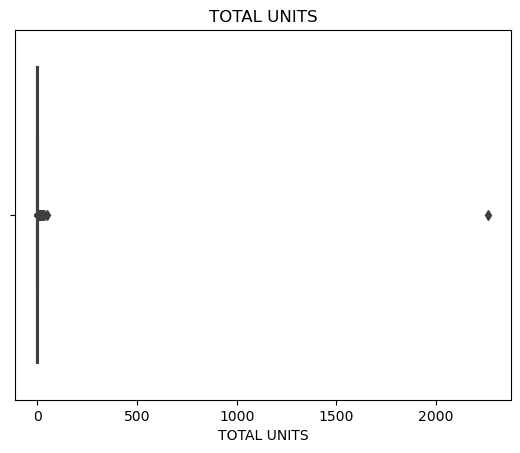

In [46]:
# ploting using boxplot to see the outliers
sns.boxplot(x='RESIDENTIAL UNITS',data=df_nyc_sales)
plt.title('RESIDENTIAL UNITS')
plt.show()

sns.boxplot(x='COMMERCIAL UNITS',data=df_nyc_sales)
plt.title('COMMERCIAL UNITS')
plt.show()

sns.boxplot(x='TOTAL UNITS',data=df_nyc_sales)
plt.title('TOTAL UNITS')
plt.show()

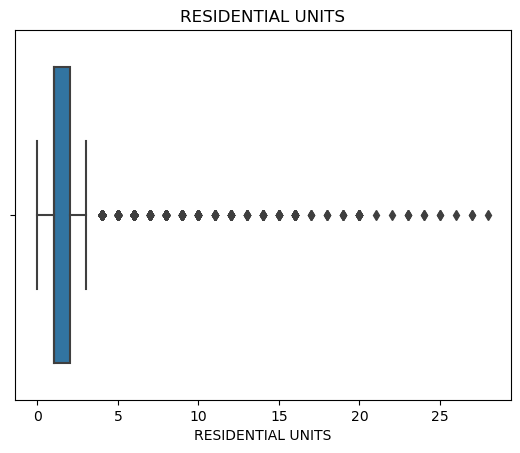

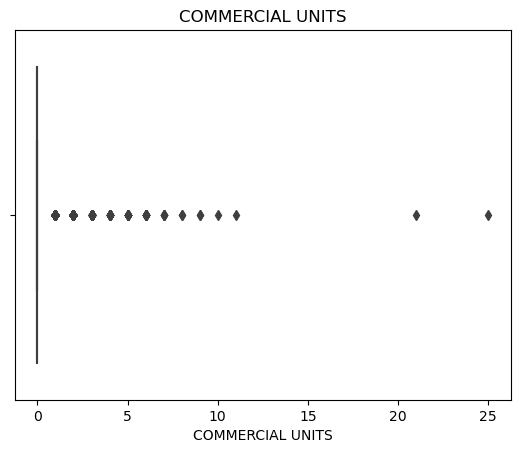

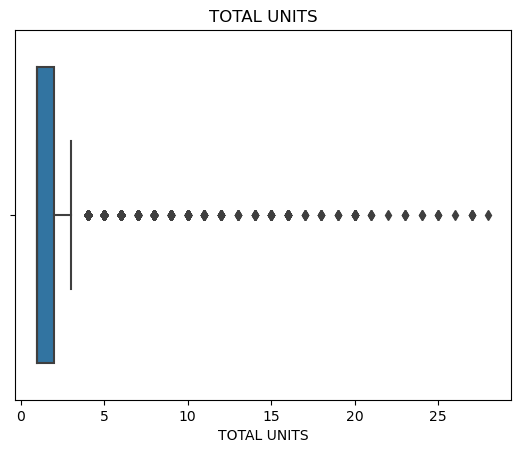

In [47]:
# hapus data properti sisa yang memiliki nilai 0 unit total
df_nyc_sales = df_nyc_sales[(df_nyc_sales['TOTAL UNITS'] > 0) & (df_nyc_sales['TOTAL UNITS'] < 30)]

#Hapus data dimana 'COMMERCIAL UNITS' + 'RESIDENTIAL UNITS' tidak sama dengan total units
df_nyc_sales = df_nyc_sales[df_nyc_sales['TOTAL UNITS'] == df_nyc_sales['COMMERCIAL UNITS'] + df_nyc_sales['RESIDENTIAL UNITS']]
sns.boxplot(x='RESIDENTIAL UNITS',data=df_nyc_sales)
plt.title('RESIDENTIAL UNITS')
plt.show()

sns.boxplot(x='COMMERCIAL UNITS',data=df_nyc_sales)
plt.title('COMMERCIAL UNITS')
plt.show()

sns.boxplot(x='TOTAL UNITS',data=df_nyc_sales)
plt.title('TOTAL UNITS')
plt.show()

# Pengukuran Tendensi Sentral

## Mean

In [48]:
print("Mean SALE PRICE = ", df_nyc_sales['SALE PRICE'].mean())
print("Median SALE PRICE = ",df_nyc_sales['SALE PRICE'].median())

Mean SALE PRICE =  13.4868288382648
Median SALE PRICE =  13.437174117244362


Hasil mean dan median untuk kolom 'SALE PRICE' menunjukkan bahwa distribusi data dari atribut ini belum normal, yang ditandai dengan nilai mean lebih besar dari median. Data cenderung condong ke kanan.

## Median

In [49]:
print("Median GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].median())
print("Mean GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].mean())

Median GROSS SQUARE FEET =  1680.0
Mean GROSS SQUARE FEET =  1830.1244601696237


In [50]:
print("Median LAND SQUARE FEET = ", df_nyc_sales['LAND SQUARE FEET'].median())
print("Mean LAND SQUARE FEET = ", df_nyc_sales['LAND SQUARE FEET'].mean())

Median LAND SQUARE FEET =  2325.0
Mean LAND SQUARE FEET =  2577.078099797076


In [51]:
cols = ['BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
for col in cols:
    print("Modus "+col+" = ",df_nyc_sales[col].mode()[0])

Modus BUILDING CLASS CATEGORY =  01 ONE FAMILY DWELLINGS                    
Modus BUILDING CLASS AT PRESENT =  R4
Modus BUILDING CLASS AT TIME OF SALE =  R4


# Measure of Spread

## Range

In [52]:
print('Range GROSS SQUARE FEET = ', (df_nyc_sales['GROSS SQUARE FEET'].max() - df_nyc_sales['GROSS SQUARE FEET'].min()))
print('Range SALE PRICE = ', (df_nyc_sales['SALE PRICE'].max() - df_nyc_sales['SALE PRICE'].min()))

Range GROSS SQUARE FEET =  19892.0
Range SALE PRICE =  3.9044153920219955


## Variance

In [53]:
print('Sampel Variance dari GROSS SQUARE FEET = ', df_nyc_sales['GROSS SQUARE FEET'].var(ddof=1))
print('Sampel Variance dari SALE PRICE = ', df_nyc_sales['SALE PRICE'].var(ddof=1))

Sampel Variance dari GROSS SQUARE FEET =  1888166.2406685778
Sampel Variance dari SALE PRICE =  0.47277989819205596


## Standard Deviation

In [54]:
print('Sampel Standard Deviation dari GROSS SQUARE FEET = ', df_nyc_sales['GROSS SQUARE FEET'].var(ddof=1)**0.5)
print('Sampel Standard Deviation dari SALE PRICE = ', df_nyc_sales['SALE PRICE'].var(ddof=1)**0.5)

Sampel Standard Deviation dari GROSS SQUARE FEET =  1374.1056148158982
Sampel Standard Deviation dari SALE PRICE =  0.6875899200774077


# Confidence Intervals

Confidence Intervals pada kasus ini akan digunakan untuk mengestimasi rata-rata harga jual properti di New York dari tahun 2016 - 2017

## Hitung rata-rata populasi

In [55]:
pop_mean_sale_price = df_nyc_sales['SALE PRICE'].mean()
pop_mean_sale_price

13.4868288382648

## Hitung standar deviasi populasi

In [56]:
pop_std_sale_price = df_nyc_sales['SALE PRICE'].std()
pop_std_sale_price

0.6875899200774077

In [57]:
df_nyc_sales['BOROUGH'] = df_nyc_sales['BOROUGH'].astype(str)
df_nyc_sales['BOROUGH'] = df_nyc_sales['BOROUGH'].str.replace("1", "Manhattan")
df_nyc_sales['BOROUGH'] = df_nyc_sales['BOROUGH'].str.replace("2", "Bronx")
df_nyc_sales['BOROUGH'] = df_nyc_sales['BOROUGH'].str.replace("3", "Brooklyn")
df_nyc_sales['BOROUGH'] = df_nyc_sales['BOROUGH'].str.replace("4", "Queens")
df_nyc_sales['BOROUGH'] = df_nyc_sales['BOROUGH'].str.replace("5", "Staten Island")

In [58]:
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,15.185745,2016-09-23
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,8.0,1750.0,4226.0,1920.0,2,C4,14.976421,2016-09-23
76,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R2,13.337475,2016-12-30
79,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,13.544579,2016-09-21
80,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,13.557842,2016-09-12


In [59]:
print(df_nyc_sales['BUILDING CLASS CATEGORY'].mode())
df_nyc_sales['BUILDING CLASS CATEGORY'].value_counts()

0    01 ONE FAMILY DWELLINGS                    
Name: BUILDING CLASS CATEGORY, dtype: object


01 ONE FAMILY DWELLINGS                         12393
02 TWO FAMILY DWELLINGS                          9565
13 CONDOS - ELEVATOR APARTMENTS                  8924
03 THREE FAMILY DWELLINGS                        2241
07 RENTALS - WALKUP APARTMENTS                   1315
04 TAX CLASS 1 CONDOS                            1203
15 CONDOS - 2-10 UNIT RESIDENTIAL                 928
12 CONDOS - WALKUP APARTMENTS                     645
22 STORE BUILDINGS                                341
14 RENTALS - 4-10 UNIT                            285
29 COMMERCIAL GARAGES                             126
21 OFFICE BUILDINGS                               114
30 WAREHOUSES                                     107
27 FACTORIES                                       62
37 RELIGIOUS FACILITIES                            36
05 TAX CLASS 1 VACANT LAND                         36
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT         25
33 EDUCATIONAL FACILITIES                          12
31 COMMERCIAL VACANT LAND   

BUILDING CLASS CATEGORY yang paling banyak muncul pada dataset ini adalah ONE FAMILY DWELLINGS dengan jumlah total 12327

In [60]:
df_nyc_sales.var()

C:\Users\Bintang\AppData\Local\Temp\ipykernel_6296\492960935.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_nyc_sales.var()


BLOCK                1.397140e+07
LOT                  5.094178e+05
RESIDENTIAL UNITS    1.792915e+00
COMMERCIAL UNITS     1.616931e-01
TOTAL UNITS          1.977390e+00
LAND SQUARE FEET     3.085213e+06
GROSS SQUARE FEET    1.888166e+06
SALE PRICE           4.727799e-01
dtype: float64

In [61]:
df_borough = df_nyc_sales.groupby('BOROUGH', axis=0).sum()
df_borough

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Bronx,14970519,1128037,7308,357,7665.0,9350376.0,8151877.0,46503.852270
Brooklyn,48541074,4864261,20879,1130,22009.0,18971748.0,19925993.0,158373.458944
Manhattan,5477518,7029041,6425,107,6532.0,12198592.0,9712471.0,74994.751204
Queens,93951107,3468906,18489,828,19317.0,38403757.0,23171566.0,167657.564378
Staten Island,18248842,1115279,6886,179,7065.0,20133255.0,9384417.0,70877.100089


Dengan melihat data diatas, apakah harga rata rata per unit pada borough Staten Island lebih besar secara signifikan daripada Bronx?
<ol>
<li>h0 = Tidak ada perbedaan secara signifikan pada harga rata rata perunit antara borough Staten Island dan Bronx</li>
<li>h1 = Terdapat perbedaan secara signifikan pada harga rata rata per unit antara borugh Staten Island dan Bronx</li>
</ol>

In [62]:
Bronx = df_nyc_sales[df_nyc_sales['BOROUGH']=='Bronx']
Staten_Island = df_nyc_sales[df_nyc_sales['BOROUGH']=='Staten Island']

In [63]:
total_unit_Bronx = df_borough.iloc[0, 4]
mu_Bronx = Bronx['SALE PRICE'].mean()
std_Bronx = Bronx['SALE PRICE'].std()
total_unit_Bronx, mu_Bronx, std_Bronx

(7665.0, 13.000797391746934, 0.5896243066306038)

In [64]:
total_unit_SI = df_borough.iloc[-1, 4]
mu_SI = Staten_Island['SALE PRICE'].mean()
std_SI = Staten_Island['SALE PRICE'].std()
total_unit_SI, mu_SI, std_SI

(7065.0, 13.040864781783236, 0.4349173263768119)

In [65]:
from statsmodels.stats.weightstats import ztest
ztest, pval= ztest(Staten_Island['SALE PRICE'],Bronx['SALE PRICE'])
print("pval: ",float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

pval:  0.00020998748814337698
reject null hypothesis


<b>ANALISIS</b>
</br>
Karena nilai p-value 0.00020998748814337698 sangat kecil dan nilainya kurang dari atau sama dengan alpha (0.05)

# Overall Analysis

<b>Kesimpulan :</b>Dengan hasil ini dapat ditarik kesimpulan bahwa terdapat perbedaan yang cukup signifikan pada harga rata-rata per unit antara borugh Staten Island dengan Bronx